# Day 2: Linear Regression
## Module Outline:
- M2: *Lab*: Simple Linear Model
- M3: *Lab*: Goodness of Fit
- M4: *Demo*: Statistics of the LS Solution
- M5: *Demo*: Least Squares Solution
- M6: *Demo*: Multivariable Regression on Boston Housing Data
- M7: *Demo*: Transformed Output Using Cars MPG Data
- M8: *Lab*: Multiple Linear Regression for Robot Arm Calibration
- M9: *Demo*: Polynomial Regression
- M10: *Demo*: Transformed Linear Model
- M11: *Lab*: Transformed Linear Model

# M2: *Lab*: Simple Linear Model



In this demo, you will load data, plot data, perform simple mathematical manipulations, and fit a straight line to a model. This demo uses the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/datasets/Housing

First, use `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [1]:
import pandas as pd
import numpy as np
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, names=names, delim_whitespace=True,na_values='?')

df.head(5)  # print the first six examples

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Preparation

What is the shape of the data?  How many attributes are there?  How many samples?

In [ ]:
(num_samples, num_attributes) = df.shape
print('num samples = ',num_samples, 'num attributes =', num_attributes)

num samples =  506 num attributes = 14


### Target Vector

Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [4]:
print(df.columns.tolist())
y = df['PRICE']


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


### Predictor Vector

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.



In [ ]:
x = df['RM']

## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Create a scatter plot of the price vs. the `RM` attribute. 

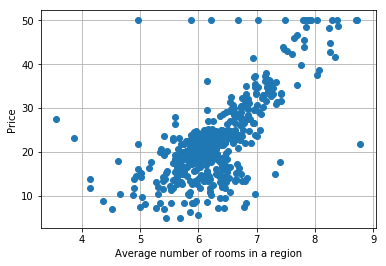

In [ ]:
plt.plot(x,y,'o')
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid(True)

## Manually estimate a linear model

In [ ]:
from sklearn import linear_model
# sklearn is a simple ML Library
regr = linear_model.LinearRegression() 
x_1 = np.array(x).reshape(-1,1)
y_1 = np.array(y).reshape(-1,1)
regr.fit(x_1, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = regr.predict(x_1)

error = np.mean((y_1 - ypred)**2)
print(error)
print(y_1.shape)
print(ypred.shape)

print(regr.intercept_)
print(regr.coef_)

43.60055177116956
(506, 1)
(506, 1)
[-34.67062078]
[[9.10210898]]


We will fit a line to these data points. Roughly estimate the slope and y-intercept of the line that best fits this data.

Now, Replot the scatter plot above, but now with the line on top of the above plot

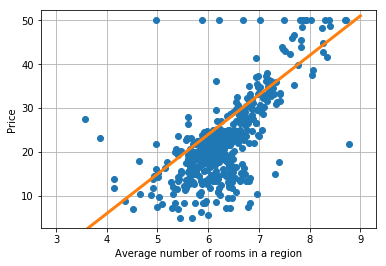

In [ ]:
beta1 = 9
beta0 = -30
xplt = np.array([3,9]) 
yplt = beta1*xplt + beta0
plt.plot(x,y,'o')    # Plot the data points
bottom, top = plt.ylim()
plt.ylim((bottom, top))
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid(True)

# M3: *Demo*: Goodness of Fit

There are several metrics that can measure the goodness of the fit. We will discuss about them as we go along. 
The (normalized) residual sum of squares, $$MSE=\frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y}_i)^2$$
   is one such metric shown below.

In [ ]:
yhat=beta0+beta1*x
MSE = np.mean((y-yhat)**2)
print("RSS = {0:7.2f}".format(MSE))

RSS =   59.84


# M4: *Demo*: Statistics for Least-Squares Solution 


## Basic Manipulations on the data



Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).

In [ ]:
mean = np.mean(y)
j = 0;
for i in range(len(y)):
    if y[i] >= 40:
        j = j+1      
percent = (j/len(y))*100
print('The mean house price is', mean, 'thousands of dollars')
print('Only', percent, 'percent are above $40k')

The mean house price is 22.532806324110698 thousands of dollars
Only 6.126482213438735 percent are above $40k


## Calculate the mean, variance, covariance to find the model parameters

Covariance is a measure of how much two random variables vary together. It's similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.
- Large positive covariance
- Zero covariance
- Large negative covariance

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. ... A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation.

In [ ]:
xm = np.mean(x)
ym = np.mean(y)
syy = np.mean((y-ym)**2)
syx = np.mean((y-ym)*(x-xm))
sxx = np.mean((x-xm)**2)

## Lab: Gaining Intuition for some Statistics

import the data from the github

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/nikopj/SummerML/master/Day2/DATA.csv'
df = pd.read_csv(url)

df.head(5)

,x,y,case
0,0.246,0.174,0.0
1,0.250,-0.487,0.0
2,0.255,-0.202,0.0
3,0.263,-0.426,0.0
4,0.258,0.017,0.0


The data is organized into **cases**. Each case represents a different relationship between the variables x and y. We can choose the samples from a single case by using *logical indexing*.

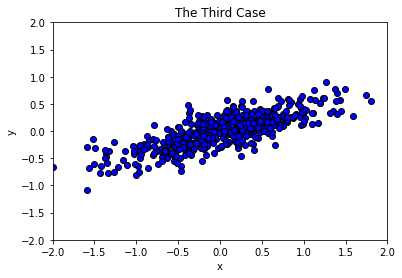

In [ ]:
x = df['x'].values
y = df['y'].values
case = df['case'].values

log_ind = (case==3)

x0 = x[log_ind]
y0 = y[log_ind]

plt.plot(x0,y0,'ob',markeredgecolor='black')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x')
plt.ylabel('y');
plt.title('The Third Case');

There are 11 cases in this dataset. Each case has 500 samples of (x,y) pairs associated with it. That means we have 5500 samples all together!
### Your Task:
- For Cases 0 and 1:
  - Graph a scatter plot for each case with xlims [-2,2] and ylims [-2,2]
  - Compute the **mean of x**, **mean of y**, **variance of x**, and **variance of y**
  - Visually, what do these statistics mean?

First, write a function that computes statistics for the case and prints them out.

In [ ]:
def print_stats(x,y):
  xm = np.mean(x)
  ym  = np.mean(y)
  xv = np.var(x)
  yv = np.var(y)
  cov = np.mean( (x-xm)*(y-ym) )
  r  = cov/np.sqrt(xv*yv)
  print('Xmean =',xm,'Ymean =',ym)
  print('Xvar =',xv,'Yvar =',yv)
  print('Covxy = ', cov)
  print('Corr  = ', r)

## Pause for lecture

 ### Your Task:
- For Cases 2 to 8:
  - Graph a scatter plot for each case with xlims [-2,2] and ylims [-2,2]
  - Compute the **variance of x**, **variance of y**, **covariance of x and y** and the **correlation coefficient**
  - Visually, what do these statistics mean? How is covariance different from correlation coefficient?
  
  Extra: can you write a for-loop for this?

------- Case 0 -------
Xmean = 0.2502124542124542 Ymean = -0.09103479853479853
Xvar = 0.000104431053683801 Yvar = 0.0956485061150693
Covxy =  0.0003382802868681994
Corr  =  0.10703424858866659
------- Case 1 -------
Xmean = -0.7364339999999999 Ymean = 0.39985200000000004
Xvar = 0.112271325644 Yvar = 0.00010185009600000002
Covxy =  -3.4040231999999215e-05
Corr  =  -0.010066473734127598
------- Case 2 -------
Xmean = -0.004811999999999998 Ymean = -0.004811999999999998
Xvar = 0.099413600656 Yvar = 0.099413600656
Covxy =  0.099413600656
Corr  =  1.0
------- Case 3 -------
Xmean = 0.021493999999999985 Ymean = 0.00922
Xvar = 0.400380357964 Yvar = 0.0981194836
Covxy =  0.15649224932
Corr  =  0.7895485206949822
------- Case 4 -------
Xmean = -0.018836 Ymean = 0.001365999999999997
Xvar = 0.110433133104 Yvar = 0.098771180044
Covxy =  0.039707839976000005
Corr  =  0.38019941553845693
------- Case 5 -------
Xmean = -0.01118 Ymean = 0.009584000000000004
Xvar = 0.0940504396 Yvar = 0.1061449989440000

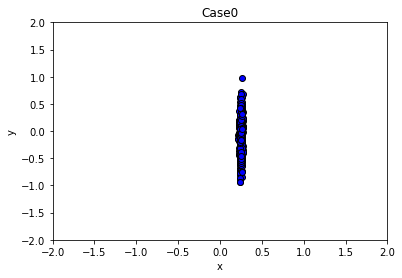

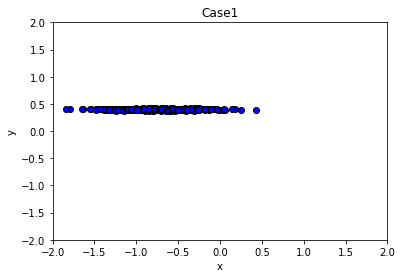

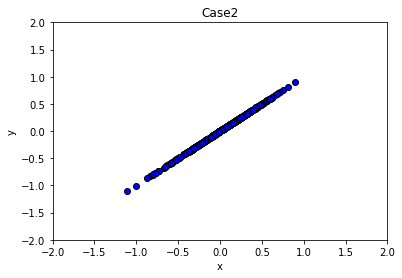

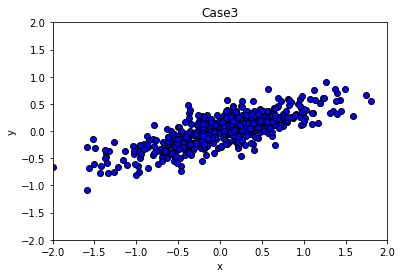

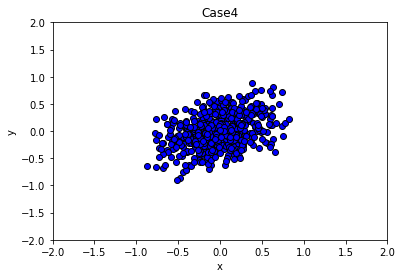

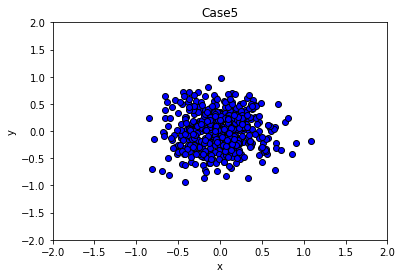

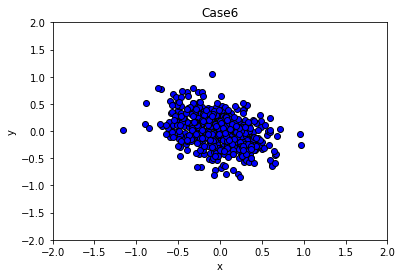

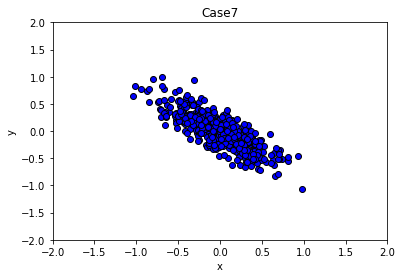

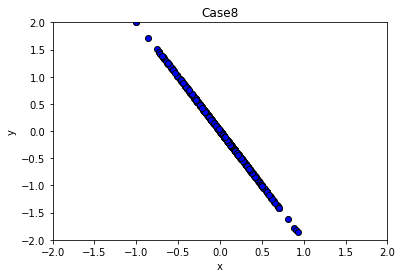

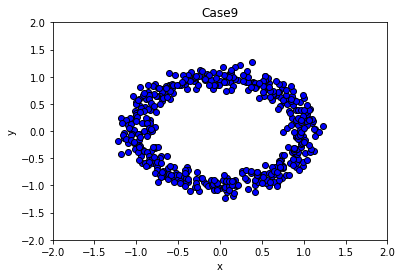

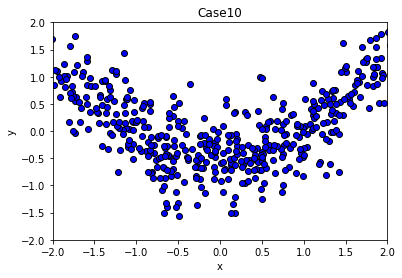

In [ ]:
x = df['x'].values
y = df['y'].values
case = df['case'].values

for i in np.arange(11):
  log_ind = (case==i)

  x0 = x[log_ind]
  y0 = y[log_ind]

  plt.figure()
  plt.plot(x0,y0,'ob',markeredgecolor='black')
  plt.xlim([-2,2])
  plt.ylim([-2,2])
  plt.xlabel('x')
  plt.ylabel('y');
  plt.title('Case'+str(i));
  print("------- Case %d -------" % i)
  print_stats(x0,y0)

## Pause for lecture

### Your Task
- For Cases 10 and 11:
  - Graph a scatter plot for each case with xlims [-2,2] and ylims [-2,2]
  - Compute *all* of the above metrics
  - What do these statistics mean?

# M5: *Demo*: Least-Squares Solution

##Computing the parameters for linear fit

We can now try to fit a linear model,  $\hat{y} = \beta_0 + \beta_1 x$. From class, the formulae are: $$\beta_1 = s_{yx}/s_{xx}, \quad \beta_0 = \bar{y} - \beta_1\bar{x},$$ where $\bar{x}$ and $\bar{y}$ are the sample means and $s_{yx}$ and $s_{xx}$ are the covariance and variances

In [ ]:
beta1 = syx/sxx
beta0 = ym - beta1*xm

print("xbar     ={0:7.2f},       ybar={1:7.2f}".format(xm,ym))
print("sqrt(sxx)={0:7.2f},  sqrt(syy)={1:7.2f}".format(np.sqrt(sxx),np.sqrt(syy)))
print("beta0={0:7.2f}, beta1={1:7.2f}".format(beta0,beta1))

xbar     =   6.28,       ybar=  22.53
sqrt(sxx)=   0.70,  sqrt(syy)=   9.19
beta0= -34.67, beta1=   9.10


## Plotting the linear fit

We can create a plot of the regression line on top of the scatter plot. The vector xplt are the x-coordinates of the two endpoints of the line. They are chosen so that the line fits nicely in the plot.

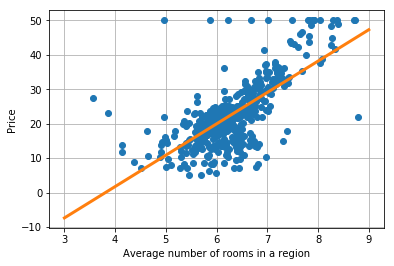

In [ ]:
# Points on the regression line
xplt = np.array([3,9])          
yplt = beta1*xplt + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the regression line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid(True)

## Goodness of fit

In [ ]:
yhat=beta0+beta1*x
MSE = np.mean((y-yhat)**2)
print("MSE = {0:7.2f}".format(MSE))

RSS =   43.60


# M6: *Demo*: Multivariable Regression on Boston Housing Data

Code that should already have come before...

Let's read in the data and see what it looks like...

In [ ]:
import pandas as pd
import numpy as np

names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None,delim_whitespace=True,names=names,na_values='?')

df.head(6)  # print the first six samples

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Forming the Feature Vectors
We want to put our features into feature vectors (stacked into a feature matrix).

In [ ]:
features = df.columns.tolist()
features.remove('PRICE')


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
0    0.00632
1    0.02731
2    0.02729
Name: CRIM, dtype: float64
[0.00632 0.02731 0.02729]


Treat all the features as a vector, $\mathbf{x}$, and stack the samples in a $N$ by $D$ matrix, $X$, where $N$ is the number of samples and $D$ is the number of features.

In [ ]:
X = np.hstack([df[f].values.reshape(-1,1) for f in features])
print(X.shape)

(506, 13)


## Normalizing the Data
Normalize the data by $\mathbf{Z} = \frac{x - \bar{x}}{\sigma_x}$. This allows us to look at our learned parameters comparativley to see which features are most important for determining the output.

It's good practice to check that what you're doing makes sense by looking at the shapes of your vectors. Numpy will sometimes allow operations to pass through that you wouldn't normally think possible with special instances of *broadcasting*.

In [ ]:
Xbar = np.mean(X,axis=0,keepdims=True)
print(Xbar.shape)
Xstd = np.std(X,axis=0,keepdims=True)
print(Xstd.shape)

X = (X-Xbar) / Xstd
print(X[:3,:])

(1, 13)
(1, 13)
[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]]


(506, 14)


## LS Solution
Computing the psuedo inverse ourselves.

In [ ]:
(N,D) = X.shape

y = df['PRICE'].values.reshape(-1,1)

regr = 

MSE = np.sum( (y_hat - y)**2 ) / N
print(MSE)

21.8948311817292


Print the first values of the ground truth and model predictions to get a feel for our LS solution.

In [ ]:
with np.printoptions(precision=2):
  print(y_hat[:5].flatten())
  print(y[:5].flatten())

[30.   25.03 30.57 28.61 27.94]
[24.  21.6 34.7 33.4 36.2]


Printing the parameters to see which are treated most significantly. It seems that the proportion of lower-income people living in the neighborhood is the most significant indicator of housing costs (last parameter).

In [ ]:
with np.printoptions(precision=2,suppress=True):
  print(beta)

[[22.53]
 [-0.93]
 [ 1.08]
 [ 0.14]
 [ 0.68]
 [-2.06]
 [ 2.67]
 [ 0.02]
 [-3.1 ]
 [ 2.66]
 [-2.08]
 [-2.06]
 [ 0.85]
 [-3.74]]


Using Numpy's built in function ```np.lstsq()```, we see we get the same results. Numpy has optimized their function to be much quicker, so use their's going forward.

In [ ]:
soln = np.linalg.lstsq(A,y,rcond=None)
beta = soln[0]
MSE = soln[1] / N

with np.printoptions(precision=2,suppress=True):
  print(beta)
  print(MSE)

[[22.53]
 [-0.93]
 [ 1.08]
 [ 0.14]
 [ 0.68]
 [-2.06]
 [ 2.67]
 [ 0.02]
 [-3.1 ]
 [ 2.66]
 [-2.08]
 [-2.06]
 [ 0.85]
 [-3.74]]
[21.89]


# M7: *Demo*: Transforming the Output Data

In [ ]:
import matplotlib.pyplot as plt


names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',delim_whitespace=True,header=None,names=names)
df.head(8)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii


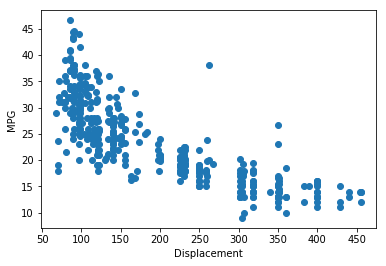

In [ ]:
y = df['mpg'].values.reshape(-1,1)
x = df['displacement'].values.reshape(-1,1)

plt.figure()
plt.scatter(x,y)
plt.xlabel('Displacement');
plt.ylabel('MPG');

0.6467421834257859


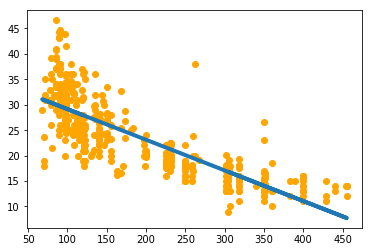

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x,y)
yhat = regr.predict(x)

plt.figure()
plt.scatter(x,y, color = 'orange')
plt.plot(x,yhat, linewidth = '4')

print(regr.score(x,y))

#### Clearly, the relation between mpg and displacement is not linear.
#### If we just apply linear regression directly, it does not lead to a good fit.

####  Looks like mpg has exponential decay behavior with respect to the displacement.
#### We can transform the data by taking the log of y, so that it becomes linear

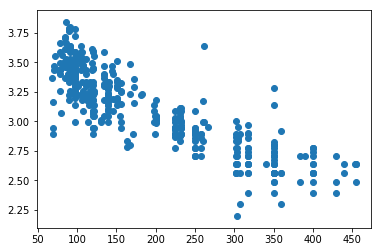

In [ ]:
y_transformed = np.log(y)
plt.figure()
plt.scatter(x,y_transformed)

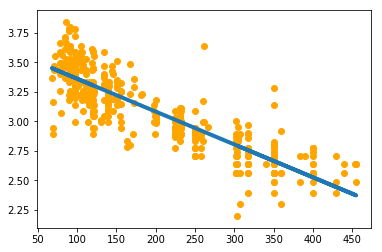

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x,y_transformed)
yhat = regr.predict(x)

plt.figure()
plt.scatter(x,y_transformed, color = 'orange')
plt.plot(x,yhat, linewidth = '4')

In [ ]:
print(regr.score(x,y_transformed))

0.7286645595672465


# M8: *Lab*: Multiple Linear Regression for Robot Arm Calibration



In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  In addition understanding the concepts in the multivariable linear regression demo (with Boston housing data), you will see how to use multiple linear regression for time series data -- an important concept in dynamical systems such as robotics.

The robot data for the lab is taken from the TU Dortmund's [Multiple Link Robot Arms Project](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html).  As part of the project, they have created an excellent public dataset: [MERIt](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="http://www.rst.e-technik.tu-dortmund.de/cms/Medienpool/redaktionelleBilder/Forschung/Schwerpunkte/TUDOR_engl/TUDORBild.png" height="200" width="200">


**We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.**

#### Load and Visualize the Data
First, import the modules we will need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large. Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  

We are going to use the following file:
* [robot_arm.csv](https://raw.githubusercontent.com/nikopj/SummerML/master/Day3/robot_arm.csv) 

Below, we have supplied the column headers in the `names` array.  

**Use the `pd.read_csv` command to load the data.  Use the `index_col` option to specify that column 0 (the one with time) is the *index* column.**


In [ ]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]


# TODO 
# df = pd.read_csv(...)

df = pd.read_csv('https://raw.githubusercontent.com/nikopj/SummerML/master/'
                 +'Day3/robot_arm.csv', header=None,sep=',',names=names, 
                 index_col=0)

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [ ]:
# TODO

df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


**From** the dataframe `df`, extract the *time* indices into a vector `t` and extract `I2`, the *current* into the second joint.  Place the *current* in a vector `y` and plot `y` vs. `t`.   Label the axes with the units.

Text(0, 0.5, 'Current I2 (A)')

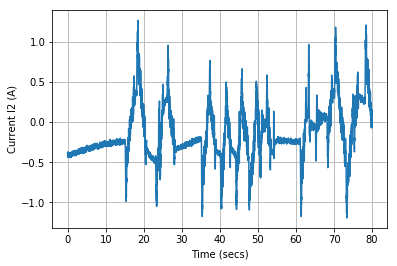

In [ ]:
# TODO
# y = ...
# t = ...
# plt.plot(...)


y = np.array(df['I2'])
t = np.array(df.index)
plt.plot(t,y)
plt.grid()
plt.xlabel('Time (secs)')
plt.ylabel('Current I2 (A)')

Let's use all the samples from the dataset that we need to train our model with:

* `y`:  A vector of all the samples from the `I2` column
* `X`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [ ]:
# TODO
# y = ...
# X = ...


y = np.array(df['I2'])
X = np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])

#### Fit a Linear Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [ ]:
# Create linear regression object
# TODO
# from ...
# regr = ...

from sklearn import linear_model
regr = linear_model.LinearRegression()

Train the model on the our data.

In [ ]:
# TODO

regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using the trained model, compute, `y_pred`, the predicted *current*.  Plot `y_pred` vs. time `t`.  On the same plot, plot the actual *current* `ytrain` vs. time `t`.  Create a legend for the plot.

Text(0, 0.5, 'Current I2 (A)')

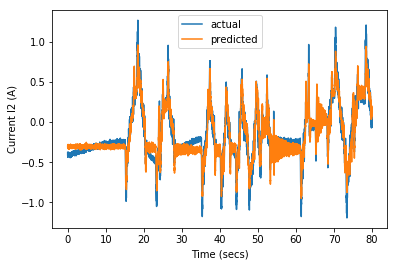

In [ ]:
# TODO
y_pred = regr.predict(X)
plt.plot(t,y)
plt.plot(t,y_pred)
plt.legend(['actual', 'predicted'])
plt.xlabel('Time (secs)')
plt.ylabel('Current I2 (A)')

#### Goodness of the fit

Measure the normalized RSS given by 
$$
    \frac{RSS}{n s^2_y}.
$$


Measure the R^2 score. 

In [ ]:
# TODO
RSS = np.mean((y-y_pred)**2) / np.mean((y-np.mean(y))**2)
print('RSS =', RSS)

R2 = 1 - RSS
print('R^2 score =', R2)

RSS = 0.09583263861233197
R^2 score = 0.9041673613876681


In [ ]:
#OR

RSS = np.sum((y-y_pred)**2)
N = y.size
syy = np.mean((y - np.mean(y))**2)
R2 = 1 - (RSS/N)/syy

print('RSS =',(RSS/N)/syy)
print('R^2 =', R2)

RSS = 0.09583263861233197
R^2 = 0.9041673613876681


# M9: *Demo*: Polynomial Regression
Can we learn to predict the values of a polynomial process? Will this be a linear model?



## Generating the Synthetic Data
We'll start with a "true" process and add some noise to the samples to give us our measured values.

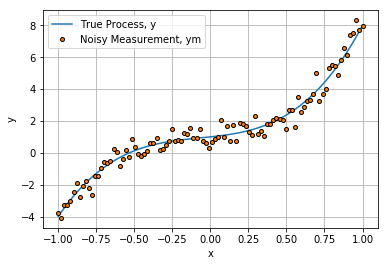

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 100 # number of samples taken
c = np.array([5,1,1,1]) # true process coefficients
var = 0.2 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y = np.polyval(c,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
ym = y + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,ym,'o',ms=4,markeredgecolor='black')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y','Noisy Measurement, ym']);

## The Model for Polynomial Regression
Come up with a mathematical model for this regression problem. What are the input features? What does this look like matricially?

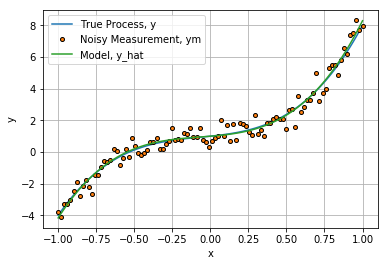

In [ ]:
M = 3 # model order

# reshape to column vectors
x = x.reshape(-1,1); ym = ym.reshape(-1,1)
# forming the design matrix 
A = np.hstack([x**m for m in np.arange(M+1)])
# finding least squares solution
soln = np.linalg.lstsq(A,ym,rcond=None)
c_hat = soln[0];

# model outputs
y_hat = np.matmul(A,c_hat)

plt.plot(x,y)
plt.plot(x,ym,'o',ms=4,markeredgecolor='black');
plt.plot(x,y_hat)
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True Process, y','Noisy Measurement, ym','Model, y_hat']);

# M11: *Lab*: Fitting a curve with transformation

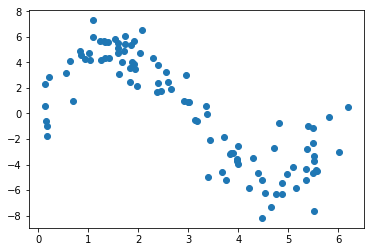

In [ ]:
npts = 100
x = np.random.rand(npts,1)*2*np.pi
y = 5*np.sin(x) + np.random.randn(npts,1)*1.5

plt.scatter(x,y)

#### What transformation do you think can be used to fit this curve?


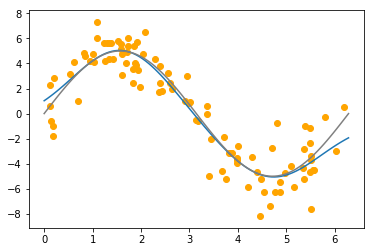

In [ ]:
## Solution
## Use Gaussian to fit the sine wave
## Can also use polynomial
def gauss(x,mu,sigma):
  y = np.exp(-((x-mu)**2)/(2*sigma**2))
  return y

mu1 = np.pi/2
mu2 = 3*np.pi/2
sigma = 1
X = np.hstack((gauss(x,mu1,sigma),gauss(x,mu2,sigma)))
regr = LinearRegression()
regr.fit(X,y)

x_ax = np.linspace(0,2*np.pi,npts).reshape(-1,1)
x_ax_transf = np.hstack((gauss(x_ax,mu1,sigma),gauss(x_ax,mu2,sigma)))
yhat = regr.predict(x_ax_transf)
plt.plot(x_ax, yhat)
plt.scatter(x,y,color = 'orange')
plt.plot(x_ax,5*np.sin(x_ax), color='gray')